# Xpand IT DS Challenge

This notebook contains the template you should use to present your code, results and conclusions. You should keep the main structure intact to make it easier to evaluate and compare in the end.

## Dataset
You can find the dataset in the data folder of the repository. The folder contains two files:
* dow_jones_index.data - dataset data
* dow_jones_index.names - dataset information and details

## Business Analysis
Here you should conduct a brief analysis of what is Dow Jones Index. You can enumerate the main topics to take into account based on the dataset provided as well as your understandings of the variables.


-----
*Add here your business analysis conclusions (max. 200 words)*

- The DJI is a stock market indece that provides information about the financial performace of 30 companies in the  USA.

- the idea is that for a market to be considered strong it needs to have a good production of the stock and a good transportion and delivery of it as well.

Feature
- Quarter: identify sesanol trends
- Open, close, high and low: allow to understand the price difference weekly and the proffit of each product at end of the week  by comparing the open and close values.
- Volume: it can identifies the interested in the product by buyers.

- percent_change_volume_over_last_week: allows to understand how the stock is selling from week to week


- percent_change_price: simplifies the visualization of performace of each product.

- next_week variables: helps understanding the shift of the market and how the previous week influence the future prices





-----


## Data Understanding
During the data understanding phase, you should focus on understanding what each variable represents, compute statistics and visualizations. Some questions that may guide your work follow:
* Feature engineering: should new features be created from the existing ones?
* What will be your features and your label?
* Is the dataset ready for the prediction task? (ex: missing values)
* How will the data be split into train and test sets?

-----

In [1]:
#add here your imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#load data to dataframe
df = pd.read_csv('dow_jones_index.data')

In [3]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [5]:
stock_values = df['stock'].unique()
print(f'Count different types of stocks: {len(stock_values)}')

count_weeks = df['date'].unique()
print(f'Count different weeks: {len(count_weeks)}')

stock_week_count = df.groupby('stock')['date'].nunique()
print(f'Verify is every stock has data for every week: {stock_week_count} ')

#conclusion:  there are 30 different types of stocks and each stock has data for the existent 25 weeks

Count different types of stocks: 30
Count different weeks: 25
Verify is every stock has data for every week: stock
AA      25
AXP     25
BA      25
BAC     25
CAT     25
CSCO    25
CVX     25
DD      25
DIS     25
GE      25
HD      25
HPQ     25
IBM     25
INTC    25
JNJ     25
JPM     25
KO      25
KRFT    25
MCD     25
MMM     25
MRK     25
MSFT    25
PFE     25
PG      25
T       25
TRV     25
UTX     25
VZ      25
WMT     25
XOM     25
Name: date, dtype: int64 


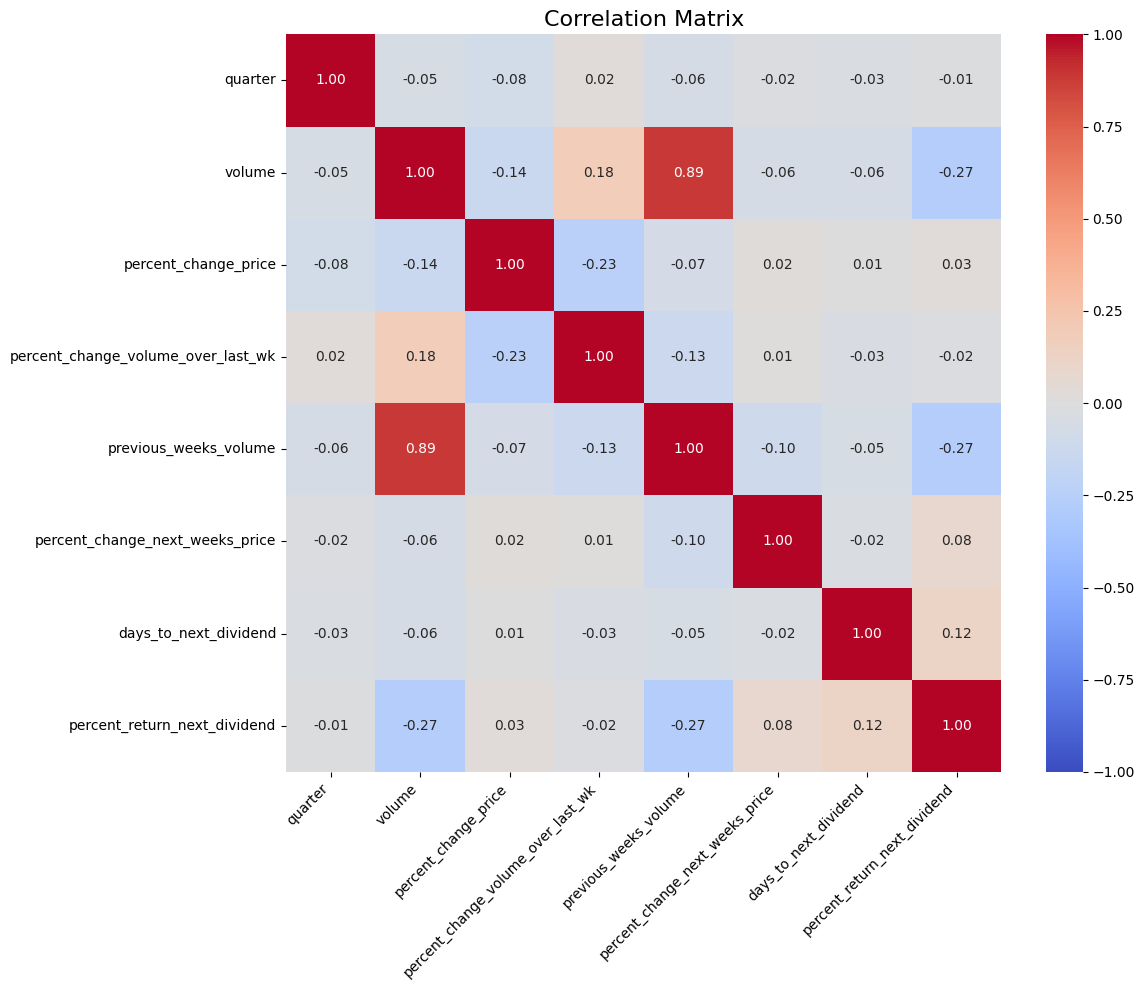

In [6]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)


plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

In [8]:
#change columns to float
df['open'] = df['open'].replace({'\$': ''}, regex=True).astype(float)
df['close'] = df['close'].replace({'\$': ''}, regex=True).astype(float)
df['high'] = df['high'].replace({'\$': ''}, regex=True).astype(float)
df['low'] = df['low'].replace({'\$': ''}, regex=True).astype(float)

In [9]:
#createing new features that show the variance between the open day and close day. And the diference between the highest values of the stock and lowest.
df['week_price_diffence']= df['close']-df['open']
df['week_high_low_distance'] = df['high']-df['low']

In [10]:
new_df = df[[ 'week_price_diffence', 'week_high_low_distance', 'percent_change_price', 'percent_change_volume_over_last_wk']]

In [11]:
new_df

,week_price_diffence,week_high_low_distance,percent_change_price,percent_change_volume_over_last_wk
0,0.60,0.94,3.79267,NaN
1,-0.74,1.07,-4.42849,1.380223
2,-0.40,0.78,-2.47066,-43.024959
3,0.26,0.81,1.63831,9.355500
4,0.96,1.21,5.93325,1.987452
...,...,...,...,...
745,2.41,2.56,3.00424,-21.355713
746,-2.10,3.57,-2.52161,15.221032
747,-1.15,2.15,-1.42098,17.508519
748,-0.98,2.49,-1.22500,8.811952


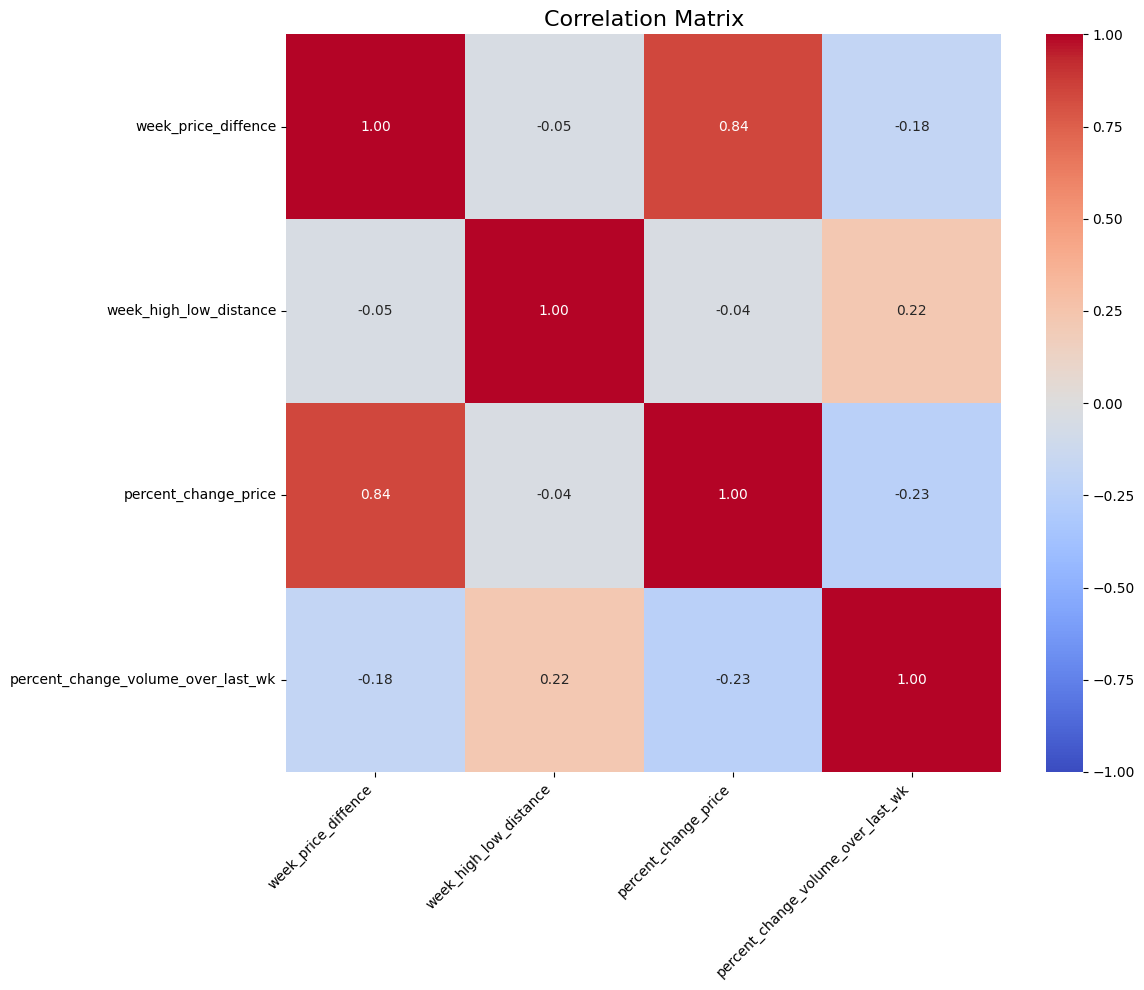

In [12]:
corr_matrix = new_df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)


plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


plt.show()

In [13]:
columns = new_df.columns
print(columns)

Index(['week_price_diffence', 'week_high_low_distance', 'percent_change_price',
       'percent_change_volume_over_last_wk'],
      dtype='object')


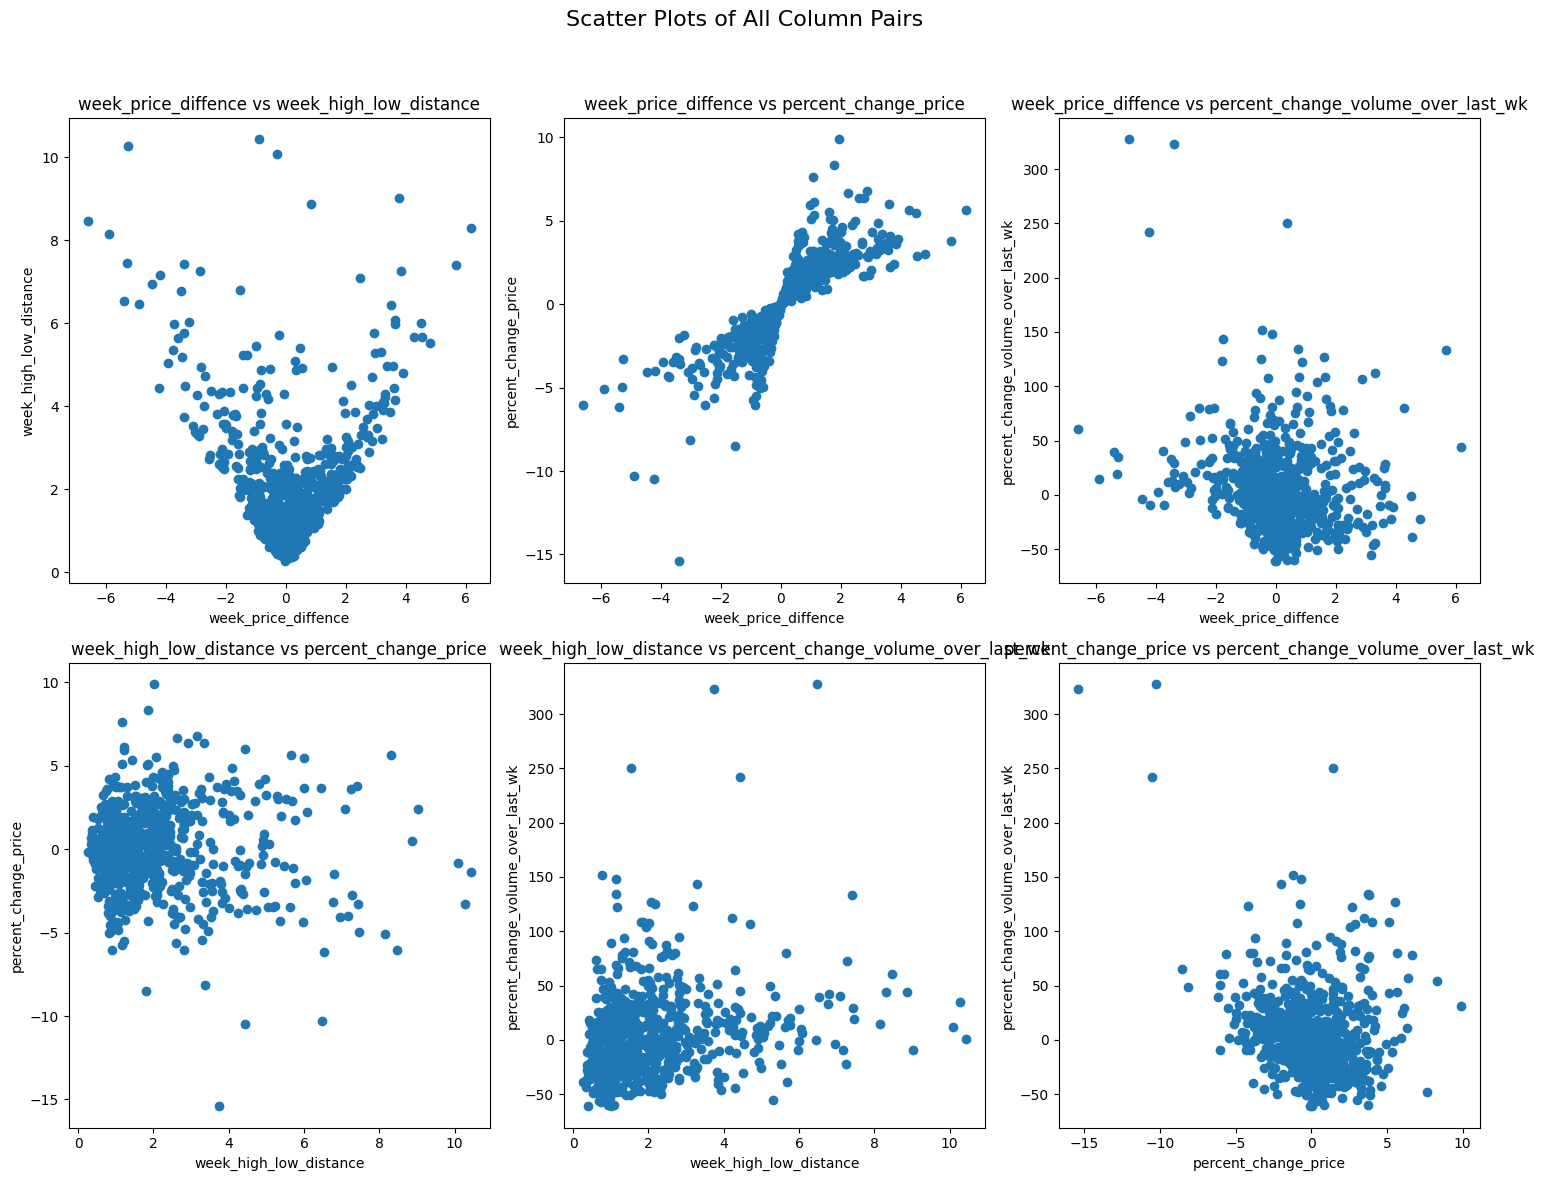

In [15]:
#Vizualization of the raletion of all features
import matplotlib.pyplot as plt
import itertools


pairs = list(itertools.combinations(columns, 2))
num_plots = len(pairs)


plots_per_row = 3

# Number of rows
num_rows = (num_plots + plots_per_row - 1) // plots_per_row

# Create subplots
fig, axs = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 6))
fig.suptitle('Scatter Plots of All Column Pairs', fontsize=16)


axs = axs.flatten()


for i, (x, y) in enumerate(pairs):

    axs[i].scatter(new_df[x], new_df[y])
    axs[i].set_xlabel(x)
    axs[i].set_ylabel(y)
    axs[i].set_title(f'{x} vs {y}')


for i in range(num_plots, len(axs)):
    axs[i].axis('off')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Conlusion:

Cleaning dataset

In [ ]:
df.isnull().sum()

,0
quarter,0
stock,0
date,0
open,0
high,0
low,0
close,0
volume,0
percent_change_price,0
percent_change_volume_over_last_wk,30


In [ ]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend,week_price_diffence,week_high_low_distance
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704,0.60,0.94
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852,-0.74,1.07
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994,-0.40,0.78
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989,0.26,0.81
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029,0.96,1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801,2.41,2.56
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960,-2.10,3.57
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120,-1.15,2.15
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786,-0.98,2.49


In [22]:
#missing values
# enject missing values for the column percent_change_volume_over_last_wk'
#percent_change_volume_over_last_wk =  (next_week_volume - volume) / volume *100
#since we have the volume from the next weeks for each stock we can calculate the percent_change_volume_over_last_week
df = df.sort_values(by=['stock', 'date'])
df['next_week_volume'] = df.groupby('stock')['volume'].shift(-1)

mask = df['percent_change_volume_over_last_wk'].isnull()


df.loc[mask, 'percent_change_volume_over_last_wk'] = ((df['next_week_volume'] - df['volume']) / df['volume']) * 100





In [23]:
df.isnull().sum()

,0
quarter,0
stock,0
date,0
open,0
high,0
low,0
close,0
volume,0
percent_change_price,0
percent_change_volume_over_last_wk,0


-----
*Add here your data understanding findings and conclusions (max. 200 words)*

In order to understand wich is the best company to invest in each week, it is necessary to verify the company that will give the best profit in each week

- 100€ to invest in one stock each week
- The client buy at the start of the week (open price)

- The client sell at the end of the week ( close price)


Define the profit percentage in each week for each stock:   percent_change_price = (close-open)/ open (label to predicit)

**df Correlation matrix conlusions:**
- Is visable a higer coreelation between the volume freatures,  as well as, for the percent_change_price with them.  Indicating that the voulme of stock influence the percentage price of the stock.

**new_df correlation matrix conclusion:**
- By creating a new feature week_price_difference was possible to create a good relation between it and the feature percent_change_price with a values of 84%
- Also the features percent_change_volume_over_last_wk and week_high_low_distance also have a significant correlation between tem of 22%

**After analysing**
The goal is to create a regression based approach that can predict the percent_change_price of each companay every week.  After the investor can chosse the comapnay the give him the highest profit.

Features choose: 'week_price_diffence', 'week_high_low_distance', 'percent_change_price', 'percent_change_volume_over_last_wk'

Label: percent_change_day

-----

## Modelling
In this phase, your main goal is to develop and describe your approach to the solution of the problem. Some guidelines to help you:
* What metrics will you use to evaluate your solutions?
* What are some algorithms that can lead to good results? And why?
* Describe in detail your thought process during the development of your solution.
* Present your results.


-----


In [18]:
#add here your modelling code

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [24]:
features = [ 'week_price_diffence', 'week_high_low_distance', 'percent_change_price', 'percent_change_volume_over_last_wk']
target = 'percent_change_price'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Using LinearRegression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
print(f'Score: {reg.score(X_train, y_train)}')

y_pred = reg.predict(X_test)


Score: 1.0


In [29]:
#Evaluation using Linear Regression
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

RMSE: 1.0761608222641618e-14
MAE: 7.0878087139014675e-15


-----
**Simple Linear regresion**
- score = 1.0 indicates that the model fits the training perfectly.  However it can indicate overfitting

- RMSE meseures the average between the predicited and actual values. And MAE represents the average absolute difference between the predicted and the actual values.  For both RMSE and MAE the values were extremely small meaning that the the model could predict very well,  whcih is almost unrealistic and probably in new date it could not perform well.


-----

-----

## Conclusions
In the conclusions, you should enumerate the results you got after completing the challenge.
* How good do you consider your results?
* What are some factors that would contribute to get better results?
* What are some advantages and disadvantages of your solution?
* What can be done as future work to improve your results?


*Texto em itálico*-----
*Add here your final conclusions (max. 400 words)*

- the results were good for this specific  data.  However the values being so small it can be a case of overffiting, since linear regrassion may not capture complex patterns.
For the future:
-  using a croos-validation model could create a more robust model
- having a bigger dataset could also crontribute to improve the model perormance



To submit your solution you should e-mail us this notebook in response to the e-mail you initially received with the challenge.